In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('steak_data.csv')

In [2]:
df.head()

,RespondentID,"Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?",Do you ever smoke cigarettes?,Do you ever drink alcohol?,Do you ever gamble?,Have you ever been skydiving?,Do you ever drive above the speed limit?,Have you ever cheated on your significant other?,Do you eat steak?,How do you like your steak prepared?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.237566e+09,Lottery B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.234982e+09,Lottery A,No,Yes,No,No,No,No,Yes,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
3,3.234973e+09,Lottery A,No,Yes,Yes,No,Yes,Yes,Yes,Rare,Male,> 60,"$150,000.00",Graduate degree,South Atlantic
4,3.234972e+09,Lottery B,Yes,Yes,Yes,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England


In [3]:
new_df = df[['RespondentID','Gender', 'Age', 'Household Income', 'Education', 'How do you like your steak prepared?', 'Location (Census Region)' ]]

In [4]:
new_df.rename(columns = {'How do you like your steak prepared?':'Steak_preference','Location(Census Region)': 'Region'}, inplace = True) 

/Users/benjaminparsons/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
new_df.rename(columns = {'Location(Census Region)': 'Region'}, inplace = True)

In [6]:
new_df = new_df.dropna().reset_index()

In [7]:
males =new_df.loc[new_df['Gender'] == 'Male']

In [8]:
male_steak = males.groupby('Steak_preference').RespondentID.count().reset_index()

In [9]:
male_steak

,Steak_preference,RespondentID
0,Medium,64
1,Medium Well,30
2,Medium rare,69
3,Rare,8
4,Well,10


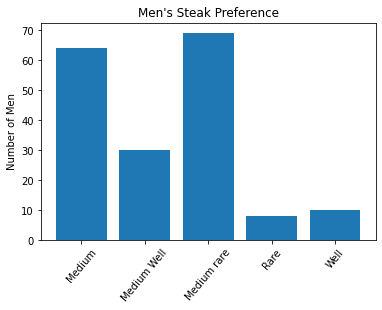

In [10]:

plt.xticks(rotation = 50)
plt.ylabel('Number of Men')
plt.title('Men\'s Steak Preference')
plt.bar(male_steak['Steak_preference'], male_steak['RespondentID'])

plt.show()

In [11]:
female = new_df.loc[new_df['Gender'] == 'Female']

In [12]:
female_steak = female.groupby('Steak_preference').RespondentID.count().reset_index()

In [13]:
female_steak

,Steak_preference,RespondentID
0,Medium,46
1,Medium Well,31
2,Medium rare,61
3,Rare,11
4,Well,13


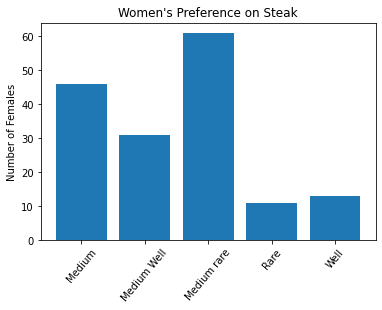

In [14]:
plt.ylabel('Number of Females')
plt.xticks(rotation = 50)
plt.title('Women\'s Preference on Steak')

plt.bar(female_steak['Steak_preference'], female_steak['RespondentID'])
plt.show()

In [15]:
income = new_df.groupby(['Steak_preference', 'Household Income'])['RespondentID'].count().reset_index()

In [16]:
income = income.pivot(columns = 'Steak_preference', index = 'Household Income', values = 'RespondentID')

In [17]:
income

Steak_preference,Medium,Medium Well,Medium rare,Rare,Well
Household Income,,,,,
"$0 - $24,999",12,9,12,2,3
"$100,000 - $149,999",20,9,29,4,5
"$150,000.00",18,7,10,3,2
"$25,000 - $49,999",16,12,26,3,2
"$50,000 - $99,999",44,24,53,7,11


## ^ Steak Preference Based on Income

In [18]:
edu = new_df.groupby(['Steak_preference', 'Education'])['RespondentID'].count().reset_index()

In [19]:
edu.pivot(index='Education', columns = 'Steak_preference', values = 'RespondentID')

Steak_preference,Medium,Medium Well,Medium rare,Rare,Well
Education,,,,,
Bachelor degree,42.0,20.0,44.0,5.0,12.0
Graduate degree,27.0,15.0,37.0,7.0,1.0
High school degree,6.0,3.0,9.0,1.0,3.0
Less than high school degree,NaN,NaN,NaN,NaN,1.0
Some college or Associate degree,35.0,23.0,40.0,6.0,6.0


## ^ Steak Preference Based on Education

In [20]:
new_df['Education'].value_counts()

Bachelor degree                     123
Some college or Associate degree    110
Graduate degree                      87
High school degree                   22
Less than high school degree          1
Name: Education, dtype: int64

In [21]:
new_df['Location (Census Region)'].value_counts()

South Atlantic        70
Pacific               57
East North Central    51
Middle Atlantic       48
West North Central    29
Mountain              28
New England           24
West South Central    20
East South Central    16
Name: Location (Census Region), dtype: int64

In [22]:
regions = new_df.groupby('Location (Census Region)').Steak_preference.value_counts()

In [23]:
regions

Location (Census Region)  Steak_preference
East North Central        Medium rare         22
                          Medium              14
                          Medium Well         10
                          Well                 4
                          Rare                 1
East South Central        Medium rare          8
                          Medium               4
                          Medium Well          3
                          Well                 1
Middle Atlantic           Medium              16
                          Medium rare         14
                          Medium Well         11
                          Rare                 4
                          Well                 3
Mountain                  Medium              10
                          Medium Well          8
                          Medium rare          7
                          Well                 3
New England               Medium rare         11
                          

## ^ Steak Preference Based on Region